# **PROYECTO DE INVESTIGACION SOBRE LA RELACION EN EL COMPORTAMIENTO DE LOS PRECIOS DE INTEL SOBRE AMD.**

*Christopher Jacob Ahumada Robles*

*Roberto Carlos Guzmán Orduño*

**Simulación Matemática**

*Prof. Gabriel A. Morales Ruiz*

**Ingeniería Financiera**

**Instituto Tecnológico y de Estudios Superiores de Occidente**

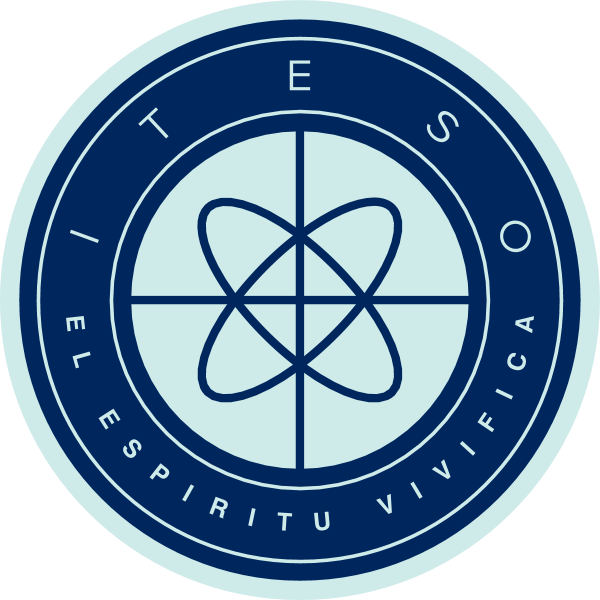


## **RESUMEN**

### **¿Por qué encontrar la correlación en el comportamiento de INTEL y AMD?**

A lo largo del tiempo, los mercados financieros han experimentado una evolución constante,
así como la innovación tecnológica y el poder computacional. En este contexto,
las empresas líderes en el sector de semiconductores, como INTEL y AMD,
experimentan un crecimiento acelerado y una dinámica particular,
por lo cual nos interesa conocer la relación que tienen estas empresas 
lideres del sector tecnológico tanto para comprender la dinámica del sector,
tener una mejor noción general sobre los riesgos de inversión en el sector tecnológico,
identificar oportunidades de inversión y aumentar la probabilidad de éxito de nuestras estrategias de trading. 


### **Índice**
- Objetivos generales	1
- Modelado matemático del caso	2
- Marco teórico e investigación	3
- Propuesta de solución	4
- Visualización de resultados	5
- Conclusiones	6
- Referencias	7



### **OBJETIVOS GENERALES**
A lo largo del presente proyecto profundizaremos en el análisis predictivo del comportamiento de los activos
utilizando técnicas de regresión lineal y optimización para así mediante datos reales de los activos encontrar
la relación entre ellos y poder contestar o acercarnos a las siguientes preguntas:
¿Qué pasa con el precio de INTEL cuando el de AMD sube?
¿Qué similitud tienen las tendencias de comportamiento entre INTEL y AMD?
Además sirve para poder determinar si la regresión lineal es un método óptimo para este análisis.


### **MODELADO MATEMATICO DEL CASO**
Realizaremos una extrapolación para predecir el comportamiento futuro de ambas compañías a partir de datos pasados o una interpolación,
la cual nos ayudara a encontrar la función que buscamos para poder determinar si existe relación entre los activos 
o necesitamos de otro método para responder las preguntas previamente planteadas, 
todo esto a su vez buscando minimizar lo más posible el error. Para lo anterior proponemos el siguiente modelo:

$$z=B_0+B_1x+B_2y$$
    
donde 

z es el precio de amd

x es el numero de dias

y es el precio de intel



### Investigación 

**Marco teórico para el análisis predictivo del comportamiento de los activos**

El análisis de regresión lineal utiliza técnicas estadísticas y matemáticas para pronosticar el comportamiento futuro
de una función mediante ajuste de curvas. Este conocimiento puede ser utilizado por los inversores 
para tomar decisiones de inversión más informadas y rentables.

Los objetivos del presente proyecto son:

Analizar la relación entre los precios de las acciones de INTEL y AMD.
Determinar si la regresión lineal es un método óptimo para el análisis predictivo del comportamiento de los activos.

El marco teórico del presente proyecto se basa en las siguientes áreas de conocimiento:

Análisis de regresión lineal: El análisis de regresión lineal es una técnica estadística que se utiliza para modelar
la relación entre una variable dependiente y una o más variables independientes. 

Optimización: La optimización es una técnica matemática que se utiliza para encontrar el valor máximo o mínimo de una función.
En este caso, la función será la ecuación de regresión lineal y el objetivo será encontrar los valores de los coeficientes de la ecuación
que minimicen el error de predicción.


Metodología 

El método que se utilizará en el presente proyecto consta de las siguientes etapas:

Recopilación de datos: Se recopilarán datos históricos sobre los precios de las acciones de INTEL y AMD.
Análisis de datos: Se analizarán los datos para identificar las relaciones entre las variables.
Estimación de la ecuación de regresión: Se estimará la ecuación de regresión lineal que mejor modele la relación 
entre el precio de las acciones de INTEL y las variables independientes.
Validación del modelo: Se validará el modelo de regresión lineal utilizando datos históricos.
Predicción del precio de las acciones: Se utilizará el modelo de regresión lineal para predecir 
el precio de las acciones de INTEL y AMD a un día.
Evaluación del modelo: Se evaluará el rendimiento del modelo de regresión lineal.



Resultados esperados

Se espera que el presente proyecto proporcione información valiosa sobre la relación entre los precios de las acciones 
de INTEL y AMD, así como los factores que influyen en esta relación.


# Propuesta de solucion

### Importamos las librerias y recopilamos los datos en un dataframe

In [43]:
import yfinance as yf 
import numpy as np
import pandas as pd

intel="INTC"
amd="AMD"

tickers=[intel,amd]
data=yf.download(tickers, start="2024-01-01", end="2024-02-01")["Adj Close"]
dias=np.linspace(0,20,21)
data["dias"]=dias

data


[*********************100%%**********************]  2 of 2 completed


Ticker,AMD,INTC,dias
Date,,,
2024-01-02,138.580002,47.660297,0.0
2024-01-03,135.320007,46.912491,1.0
2024-01-04,136.009995,46.733017,2.0
2024-01-05,138.580002,46.752960,3.0
2024-01-08,146.179993,48.308399,4.0
2024-01-09,149.259995,47.909569,5.0
2024-01-10,148.539993,47.331264,6.0
2024-01-11,148.020004,47.500767,7.0
2024-01-12,146.559998,46.982285,8.0


### Definimos la funcion de costo y las matrices correspondientes

In [44]:
def funcion(beta, X, y):
    r,c= X.shape
    beta= np.reshape(beta,[c, 1])
    y_pred= X @ beta
    error= y_pred - y
    return (error.T @ error)[0][0]

import numpy as np

m=21
ones=np.ones([m,1])
dias=np.reshape(data["dias"], [m, 1])
INTC=np.reshape(data["INTC"], [m, 1])

X=np.hstack((ones, dias, INTC))
y=np.reshape(data["AMD"],[m,1])

### Mediante optimizacion encontramos los betas que mejor adapten la regresion lineal

In [45]:
import scipy.optimize as opt

beta=[1,1,1]

opt.minimize (funcion, beta, args=(X,y))

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 363.9423577113047
        x: [ 3.035e+01  2.619e+00  2.185e+00]
      nit: 15
      jac: [ 0.000e+00  0.000e+00  0.000e+00]
 hess_inv: [[ 2.051e+01 -6.717e-02 -4.238e-01]
            [-6.717e-02  8.296e-04  1.259e-03]
            [-4.238e-01  1.259e-03  8.796e-03]]
     nfev: 80
     njev: 20

# Visualización de resultados

### Graficamos la regresión respecto a los precios de AMD

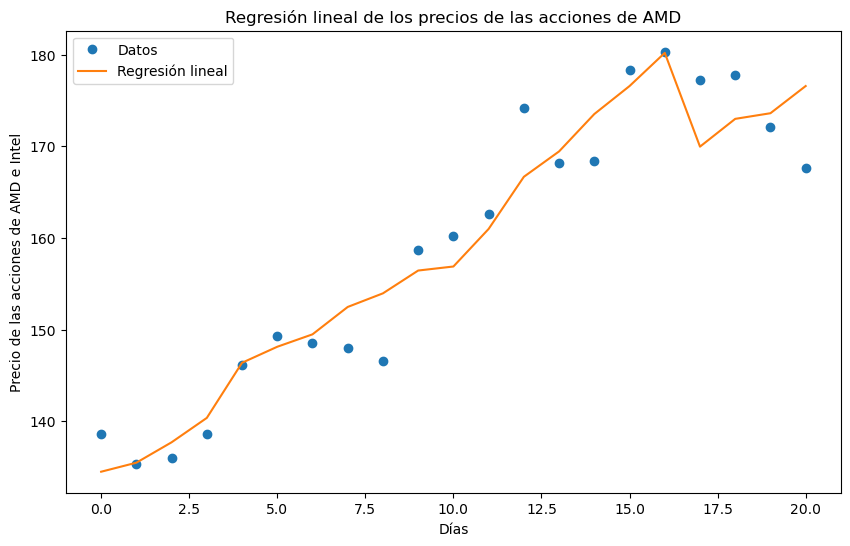

In [46]:
import matplotlib.pyplot as plt
beta_opt = [3.035e+01, 2.619e+00, 2.185e+00]  
y_pred = X @ np.reshape(beta_opt, [len(beta_opt), 1])


plt.figure(figsize=(10, 6))
plt.plot(data['dias'], data['AMD'], 'o', label='Datos')
plt.plot(data['dias'], y_pred, '-', label='Regresión lineal')
plt.xlabel('Días')
plt.ylabel('Precio de las acciones de AMD e Intel')
plt.title('Regresión lineal de los precios de las acciones de AMD')
plt.legend()
plt.show()


### Graficamos los precios de AMD para comprovar la eficacia de la regresión

[*********************100%%**********************]  2 of 2 completed


<Axes: xlabel='Date'>

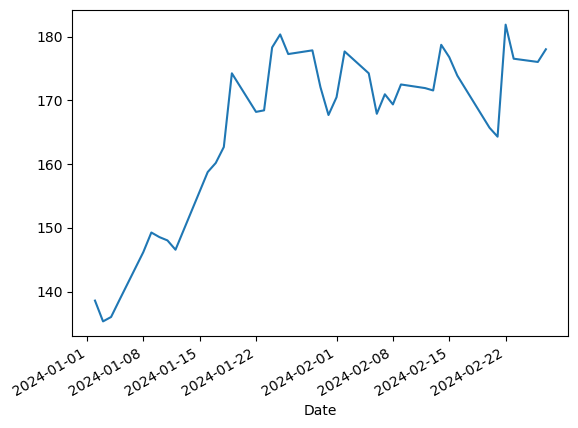

In [48]:
import yfinance as yf 
import numpy as np
import pandas as pd

intel="INTC"
amd="AMD"

tickers=[intel,amd]
data=yf.download(tickers, start="2024-01-01", end="2024-02-28")["Adj Close"]
    
data["AMD"].plot()

### Encontramos que la regresión no se ajusto perfectamente a los datos futuros pero acerto en la tendencia futura

### Graficamos la relación en ambas acciónes (precio)

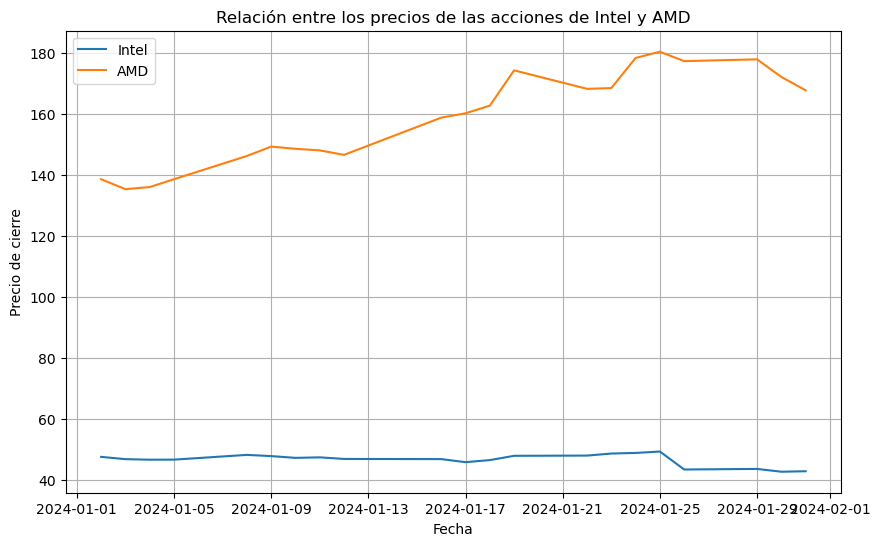

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['INTC'], label='Intel')
plt.plot(data.index, data['AMD'], label='AMD')

# Finalmente, configuramos las etiquetas y mostramos la gráfica
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.title('Relación entre los precios de las acciones de Intel y AMD')
plt.legend()
plt.grid()
plt.show()

# Conclusiones

El coeficiente obtenido para "dias" es de 2.619, este valor nos indica que por cada día que pasa, se espera que el precio de las acciones de AMD aumente en esa cantidad, manteniendo constante el precio de las acciones de Intel. Nuestro coeficiente de INTC nos dio 2.185, esto nos indica que por cada unidad que aumenta el precio de las acciones de Intel se aumenten a su vez las de AMD en 2.185 unidades, manteniendo constante el tiempo.

Lo anterior nos sugiere que existe una relación positiva entre los precios de las acciones de AMD e Intel, es decir, cuando el precio de las acciones de Intel aumentan, el precio de las acciones de AMD también aumente y viceversa. Sin embargo, es importante tener en cuenta que la regresión lineal solo captura las relaciones lineales entre las variables y que la presencia de una relación en los datos no significa que una extrapolación a mas largo plazo sea precisa en el futuro.

## Referencias

Dot CSV. (2017, 16 diciembre). Regresión lineal y mínimos cuadrados ordinarios | DotCSV [Vídeo]. YouTube. https://www.youtube.com/watch?v=k964_uNn3l0

Yahoo is part of the Yahoo family of brands. (s. f.). https://finance.yahoo.com/quote/AMD?.tsrc=fin-srch

Yahoo is part of the Yahoo family of brands. (s. f.-b). https://finance.yahoo.com/quote/INTC?.tsrc=fin-srch